In [1]:
# Installing Packages
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from math import sqrt
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## **1. Exploratory Data Analysis**

In [2]:
# Load data
data_housing = pd.read_csv('/content/Melbourne_housing.csv')
data_housing.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Thornbury,7/67 Pender St,2,u,438000.0,SP,Love,22/08/2016,6.5,3071,...,1.0,1.0,0.0,66.0,1970.0,Darebin City Council,-37.7541,145.0088,Northern Metropolitan,8870
1,Coburg,32 Rose St,2,h,901000.0,S,Peter,27/06/2016,7.8,3058,...,1.0,1.0,545.0,107.0,1940.0,Darebin City Council,-37.7445,144.9471,Northern Metropolitan,11204
2,Bentleigh East,2/25 Brooks St,3,u,800000.0,S,Woodards,28/05/2016,13.9,3165,...,2.0,2.0,261.0,NaN,NaN,Glen Eira City Council,-37.9163,145.0779,Southern Metropolitan,10969
3,Templestowe Lower,2/35 John St,3,t,1155000.0,S,Jellis,25/11/2017,12.4,3107,...,NaN,NaN,NaN,NaN,NaN,Manningham City Council,NaN,NaN,Eastern Metropolitan,5420
4,South Yarra,1/35 Marne St,3,u,1630000.0,PI,Jellis,10/9/2016,3.3,3141,...,1.0,1.0,0.0,NaN,NaN,Melbourne City Council,-37.8359,144.9839,Southern Metropolitan,14887


In [3]:
# Check the structure of the data
print(data_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         499 non-null    object 
 1   Address        499 non-null    object 
 2   Rooms          499 non-null    int64  
 3   Type           499 non-null    object 
 4   Price          391 non-null    float64
 5   Method         499 non-null    object 
 6   SellerG        499 non-null    object 
 7   Date           499 non-null    object 
 8   Distance       499 non-null    float64
 9   Postcode       499 non-null    int64  
 10  Bedroom2       371 non-null    float64
 11  Bathroom       371 non-null    float64
 12  Car            362 non-null    float64
 13  Landsize       325 non-null    float64
 14  BuildingArea   189 non-null    float64
 15  YearBuilt      212 non-null    float64
 16  CouncilArea    499 non-null    object 
 17  Lattitude      377 non-null    float64
 18  Longtitude

In [4]:
# Display the summary of the data
print(data_housing.describe(include='all'))

                Suburb          Address       Rooms Type         Price Method  \
count              499              499  499.000000  499  3.910000e+02    499   
unique             184              498         NaN    3           NaN      9   
top     Bentleigh East  10/2 Howlett St         NaN    h           NaN      S   
freq                11                2         NaN  329           NaN    281   
mean               NaN              NaN    3.028056  NaN  1.037080e+06    NaN   
std                NaN              NaN    0.945935  NaN  6.345152e+05    NaN   
min                NaN              NaN    1.000000  NaN  2.100000e+05    NaN   
25%                NaN              NaN    2.000000  NaN  6.100000e+05    NaN   
50%                NaN              NaN    3.000000  NaN  8.705000e+05    NaN   
75%                NaN              NaN    4.000000  NaN  1.262500e+06    NaN   
max                NaN              NaN    6.000000  NaN  5.500000e+06    NaN   

       SellerG        Date 

In [5]:
# Removing Unamed Column
df = data_housing.loc[:, ~data_housing.columns.str.contains('^Unnamed')]
print(df)

                 Suburb         Address  Rooms Type      Price Method  \
0             Thornbury  7/67 Pender St      2    u   438000.0     SP   
1                Coburg      32 Rose St      2    h   901000.0      S   
2        Bentleigh East  2/25 Brooks St      3    u   800000.0      S   
3     Templestowe Lower    2/35 John St      3    t  1155000.0      S   
4           South Yarra   1/35 Marne St      3    u  1630000.0     PI   
..                  ...             ...    ...  ...        ...    ...   
494            Sunshine  74 Hertford Rd      2    h   965000.0      S   
495          Springvale   15 Phillip Av      3    h   721000.0      S   
496         Middle Park     150 Page St      3    h  1750000.0     VB   
497             Glenroy   14 William St      3    h   501000.0     SP   
498  Heidelberg Heights     1 Dennis St      3    h        NaN      S   

      SellerG        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
0        Love  22/08/2016       6.5      307

### **Visualizations**

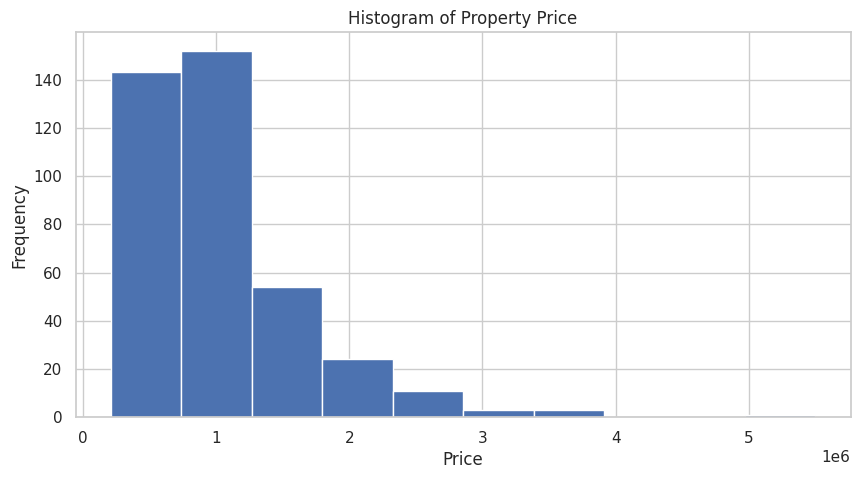

In [6]:
# Histogram of Property Price
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
df['Price'].hist(bins=10)
plt.title("Histogram of Property Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

**Insights:**

- The Price data seems to be right skewed with the mean centered around 1 million. This suggests that there are large number of properties with lower prices and small number of properties with higher prices (a general scenario in the real estate business).


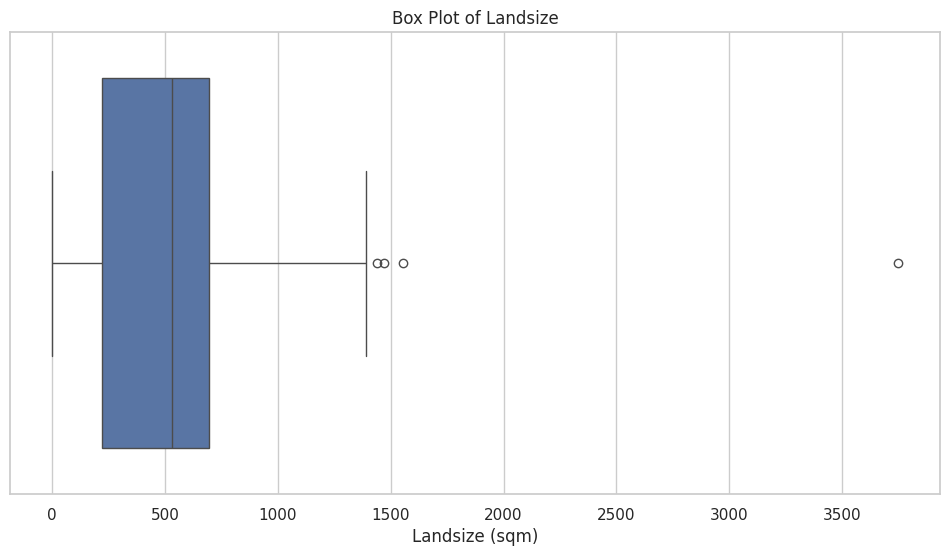

In [7]:
# Box Plot of Landsize
plt.figure(figsize=(12, 6))
sns.boxplot(x=df[df['Landsize'] < 4000]['Landsize'])
plt.title('Box Plot of Landsize')
plt.xlabel('Landsize (sqm)')
plt.show()

**Insights:**

- The median landsize appears to be 500 sqm. And majortity of the properties seem to have less than 500 sqm.
- Several points above the upper whisker seem to be outliers and they indicate unusually large landsizes.
- The extreme outlier lies above 3500 sqm which is unusually very large.

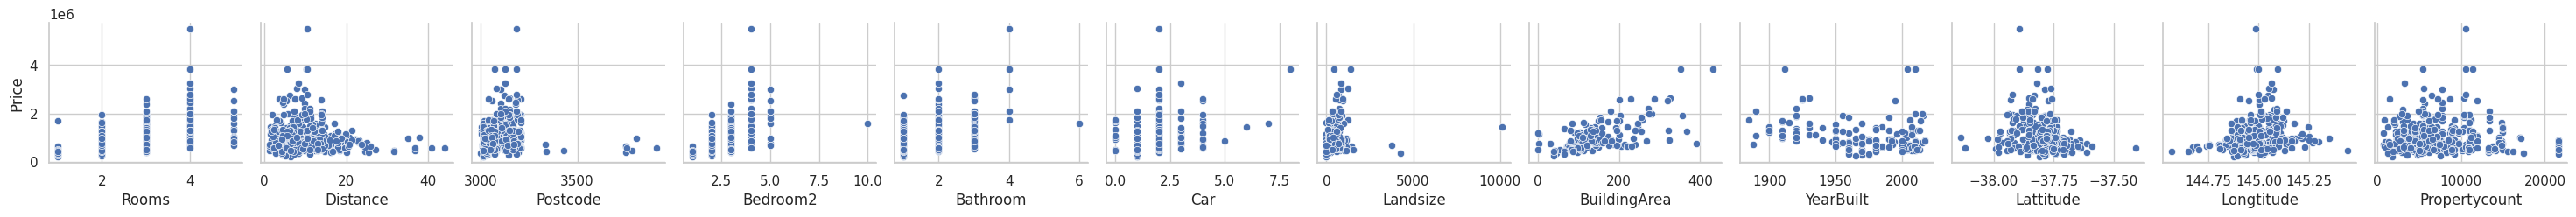

In [8]:
# Scatter Plot
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sns.pairplot(df, x_vars=[col for col in numeric_cols if col!='Price'],
             y_vars='Price', kind='scatter')
plt.show()

**Insights:**

- In all the scatter plots, there appears to be no linear relationship between the response variable and the numeric variables due to clustering and no clear patterns.
- There appears to be an outlier in almost every plot that is affecting the appearance of the these relationships.
- And clearly there is a lack of pattern in the relationship between 'YearBuilt' and 'Price', indicating that other variables might have a significant effect on the response variable than 'YearBuilt'.

## **2. Linear Regression Model Development**

### *Handling Missing Values*

> Step 1: We look for missing values. Values more than 40 are either removed or imputed. In this case, I kept the variable with the value greater than 40 because I thought it might have some relevance in the model development.

> Step 2: Removed irrelevant variables that do not have an effect on the response variable.


> Step 3: Encoded relevant categorical variables to include in the model.







In [9]:
# Handling missing values

cols_to_drop=[]
def display_missing_perc(df):
    for col in df.columns.tolist():
        missing_value = 100*(df[col].isnull().sum()/len(df[col]))
        print(f'{col} column missing values: {missing_value}')
        if missing_value >= 40:
            cols_to_drop.append(col)
    print('\n')
display_missing_perc(df)

Suburb column missing values: 0.0
Address column missing values: 0.0
Rooms column missing values: 0.0
Type column missing values: 0.0
Price column missing values: 21.64328657314629
Method column missing values: 0.0
SellerG column missing values: 0.0
Date column missing values: 0.0
Distance column missing values: 0.0
Postcode column missing values: 0.0
Bedroom2 column missing values: 25.651302605210418
Bathroom column missing values: 25.651302605210418
Car column missing values: 27.45490981963928
Landsize column missing values: 34.86973947895792
BuildingArea column missing values: 62.124248496993985
YearBuilt column missing values: 57.51503006012024
CouncilArea column missing values: 0.0
Lattitude column missing values: 24.448897795591183
Longtitude column missing values: 24.448897795591183
Regionname column missing values: 0.0
Propertycount column missing values: 0.0




In [10]:
# Removing irrelevant variables
cols_to_drop.extend(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'CouncilArea'])
df.drop(cols_to_drop, axis = 1, inplace = True)

In [11]:
# Drop the original 'Type' and 'Regionname' columns from df
df_dropped = df.drop(['Type', 'Regionname'], axis=1)

# Encode the 'Type' and 'Regionname' columns using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Type', 'Regionname'])

# Concatenate the encoded DataFrame with the original DataFrame without the dropped columns
df_final = pd.concat([df_dropped, df_encoded], axis=1)

# Final dataframe that has the original data with 'Type' and 'Regionname' encoded
print(df_final)

     Rooms      Price  Distance  Bedroom2  Bathroom  Car  Landsize  Lattitude  \
0        2   438000.0       6.5       2.0       1.0  1.0       0.0  -37.75410   
1        2   901000.0       7.8       2.0       1.0  1.0     545.0  -37.74450   
2        3   800000.0      13.9       3.0       2.0  2.0     261.0  -37.91630   
3        3  1155000.0      12.4       NaN       NaN  NaN       NaN        NaN   
4        3  1630000.0       3.3       3.0       1.0  1.0       0.0  -37.83590   
..     ...        ...       ...       ...       ...  ...       ...        ...   
494      2   965000.0      10.5       2.0       1.0  1.0       NaN  -37.78227   
495      3   721000.0      20.8       NaN       NaN  NaN       NaN        NaN   
496      3  1750000.0       3.0       3.0       2.0  0.0     138.0  -37.84962   
497      3   501000.0      13.0       3.0       1.0  1.0     348.0  -37.71190   
498      3        NaN       8.8       3.0       1.0  1.0     650.0  -37.74142   

     Longtitude  Propertyco

## **3. Model Evaluation**

In [12]:
# Identify the features (independent variables) and the target variable (dependent variable)
X = df_final.drop('Price', axis=1)  # Features
X = sm.add_constant(X)
y = df_final['Price']  # Target variable

In [13]:
# Dropping all rows where any NaN values are present
df_final.dropna(inplace=True)

In [14]:
from sklearn.impute import SimpleImputer

# This will fill in NaNs with the mean value of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_impute = imputer.fit_transform(X)
y_impute = imputer.fit_transform(y)

In [15]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_impute, y_impute, test_size=0.2, random_state=42)

In [16]:
# Assuming you have already prepared X_train, y_train, X_test
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)  # Train the model using the training data

y_pred_train = linear_regression_model.predict(X_train)
y_pred_test = linear_regression_model.predict(X_test)  # Make predictions using the test data

In [17]:
# Evaluating the TRAIN data using metrics like R^2 and RMSE for linear regression model
r2_train = r2_score(y_train, y_pred_train)
rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
print(f"Linear R-squared train: {r2_train}")
print(f"Linear Root Mean Squared Error (RMSE) train: {rmse_train}")

Linear R-squared train: 0.4258023457530262
Linear Root Mean Squared Error (RMSE) train: 446496.61737790814


In [18]:
# Evaluating TEST data using metrics like R^2 and RMSE for linear regression model
r2_test = r2_score(y_test, y_pred_test)
rmse_test = sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Linear R-squared test: {r2_test}")
print(f"Linear Root Mean Squared Error (RMSE) test: {rmse_test}")

Linear R-squared test: 0.37008866566769205
Linear Root Mean Squared Error (RMSE) test: 338881.05317811656


**Insights:**

- The R^2 for training and testing datasets are relatively low indicating that the model does not explain a large portion of the variability in the prices
- The RMSE values are unusually very high making the overall model's prediction off/under-performing
- Overall the model's performance is not very strong and we might need to use another model to boost its performance

## **4. Regularization**

**Need for Regularization:**

Yes there is a need for Regularization because the R^2 for train and test data of the Linear Regression model were very poor (Train R^2: 0.42; Test R^2: 0.37) indicating overfitting. Lasso Regression model (regularization) can be used to reduce overfitting by penalizing the coefficients of the independent variables.

In [19]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# Decide the best lambda coefficient
from sklearn.linear_model import MultiTaskLassoCV

lasso_cv = MultiTaskLassoCV(alphas=None, cv=5, random_state=0)

# Fit the model
lasso_cv.fit(X_train_scaled, y_train)

# Best alpha
print(f"Best alpha: {lasso_cv.alpha_}")

Best alpha: 18376.38341880555


In [21]:
# Initialize the Lasso regression model with a specific alpha value
lasso_model = Lasso(alpha=18376.38)

# Fit the model on the scaled training data
lasso_model.fit(X_train_scaled, y_train)

# Make predictions using the model on both the scaled training and test sets
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

print("Lasso coefficients:", lasso_model.coef_)

Lasso coefficients: [[ 0.00000000e+00  7.14494686e+04 -1.10881050e+05  0.00000000e+00
   1.31922655e+05  2.43765371e+04  7.07213659e+03 -5.37983990e+04
   2.60878444e+04  0.00000000e+00  7.05938304e+03 -3.56849660e+04
   0.00000000e+00  1.53479195e+00  0.00000000e+00  3.70136507e+00
  -3.30726143e+03  9.15439938e+03  0.00000000e+00  8.74976767e+04
  -0.00000000e+00 -9.73594656e+04  0.00000000e+00 -0.00000000e+00
  -8.03979610e+03  0.00000000e+00  0.00000000e+00  8.66683334e+04
  -1.14650829e+04 -0.00000000e+00]
 [ 0.00000000e+00  7.14494686e+04 -1.10881050e+05  0.00000000e+00
   1.31922655e+05  2.43765371e+04  7.07213659e+03 -5.37983990e+04
   2.60878444e+04  0.00000000e+00  7.05938304e+03 -3.56849660e+04
   0.00000000e+00  1.53479195e+00  0.00000000e+00  3.70136507e+00
  -3.30726143e+03  9.15439938e+03  0.00000000e+00  8.74976767e+04
  -0.00000000e+00 -9.73594656e+04  0.00000000e+00 -0.00000000e+00
  -8.03979610e+03  0.00000000e+00  0.00000000e+00  8.66683334e+04
  -1.14650829e+04 -0.

In [22]:
# Evaluating the model performance
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_rmse = sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = sqrt(mean_squared_error(y_test, y_test_pred))

In [23]:
# Evaluating TRAIN data for Lasso Regression model
print(f"Lasso Training R-squared: {train_r2}")
print(f"Lasso Training RMSE: {train_rmse}")

Lasso Training R-squared: 0.4102805344906686
Lasso Training RMSE: 452491.2627128581


In [24]:
# Evaluating TEST data for Lasso Regression model
print(f"Lasso Test R-squared: {test_r2}")
print(f"Lasso Test RMSE: {test_rmse}")

Lasso Test R-squared: 0.39312367130353476
Lasso Test RMSE: 332627.1354569728


**Insights:**

- The optimal alpha turned out to be 18376.38, which is very high. This means that a strong regularization was performed on the model leading to the shrinking of coefficients and therefore increasing interpretability.
- High alpha likely retains features that have significant impact on the response variable and sets the other coefficients to zero.
- There's been a positive increase in R^2 for the out-of-sample data due to regularization, which does seem like some improvement but it is still not very high performing.


## **5. OUT-OF-SAMPLE PERFORMANCE**

### **Newly Trained Linear and Lasso Regression Models**

***Linear Regression Model: Newly Trained***

In [25]:
# Identify the features (independent variables) and the target variable (dependent variable)
X = df_final.drop('Price', axis=1)  # Features
X = sm.add_constant(X)
y = df_final['Price']  # Target variable

In [26]:
# Dropping all rows where any NaN values are present
df_final.dropna(inplace=True)

In [27]:
from sklearn.impute import SimpleImputer

# This will fill in NaNs with the mean value of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_train = imputer.fit_transform(X)
y_train = imputer.fit_transform(y)

In [28]:
# Split the data into training and test sets
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [29]:
# Assuming you have already prepared X_train, y_train, X_test
linear_regression_model_n = LinearRegression()
linear_regression_model_n.fit(X_train_n, y_train_n)  # Train the model using the training data
r2_train_n = linear_regression_model_n.score(X_train_n, y_train_n)
print(f"New Linear R-squared train: {r2_train_n}")

New Linear R-squared train: 0.6287140460780442


***Lasso Regression Model: Newly Trained***

In [30]:
# Standardize data
scaler = StandardScaler()
X_train_scaled_n = scaler.fit_transform(X_train_n)
X_test_scaled_n = scaler.transform(X_test_n)

In [31]:
# Decide the best lambda coefficient
from sklearn.linear_model import MultiTaskLassoCV

lasso_cv_n = MultiTaskLassoCV(alphas=None, cv=5, random_state=0)

# Fit the model
lasso_cv_n.fit(X_train_scaled_n, y_train_n)

# Best alpha
print(f"Best new alpha: {lasso_cv_n.alpha_}")

Best new alpha: 27431.655633496626


In [32]:
# Initialize the Lasso regression model with a specific alpha value
lasso_model_n = Lasso(alpha=27431.65)

# Fit the model on the scaled training data
lasso_model_n.fit(X_train_scaled_n, y_train_n)

# Make predictions using the model on both the scaled training and test sets
y_train_pred_n = lasso_model_n.predict(X_train_scaled_n)

print("New Lasso coefficients:", lasso_model_n.coef_)

New Lasso coefficients: [[      0.          147412.24095931 -132902.47489629       0.
    89321.83299277   71433.53364567   12169.86808634  -61240.13108652
    62752.7012719        0.           31145.18911228  -68935.01461898
        0.               0.               0.            3007.59229261
     -745.07826865   17993.03550909       0.           94359.82568217
       -0.         -100477.25660964       0.               0.
       -0.               0.              -0.          128282.08591783
       -0.               0.        ]
 [      0.          147412.24095931 -132902.47489629       0.
    89321.83299277   71433.53364567   12169.86808634  -61240.13108652
    62752.7012719        0.           31145.18911228  -68935.01461898
        0.               0.               0.            3007.59229261
     -745.07826865   17993.03550909       0.           94359.82568217
       -0.         -100477.25660964       0.               0.
       -0.               0.              -0.          128282.

In [33]:
train_r2_n = r2_score(y_train_n, y_train_pred_n)
print(f"New Lasso R-squared train: {train_r2_n}")

New Lasso R-squared train: 0.6091070257162248


### **AIC, AICc, BIC Calculation**

***Linear Regression Model: AIC, AICc, BIC***

In [34]:
# Estimate AIC, AICc, BIC for Linear Regression Model
# Predict on the training data
y_pred_train_n = linear_regression_model_n.predict(X_train_n)

# Calculate the number of observations and parameters
n = X_train_n.shape[0]
k = X_train_n.shape[1] + 1  # Plus one for the intercept

# Compute the RSS
rss = mean_squared_error(y_train_n, y_pred_train_n) * n

# Compute the log-likelihood
log_likelihood = -n/2 * np.log(2 * np.pi * rss / n) - n/2

# Compute AIC
aic = 2 * k - 2 * log_likelihood

# Compute AICc
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)

# Compute BIC
bic = np.log(n) * k - 2 * log_likelihood

print("AIC of Linear Regression Model:", aic)
print("AICc of Linear Regression Model:", aicc)
print("BIC of Linear Regression Model:", bic)

AIC of Linear Regression Model: 6030.981149959282
AICc of Linear Regression Model: 6042.190189507305
BIC of Linear Regression Model: 6134.593511770192


***Lasso Regression Model: AIC, AICc, BIC***

In [35]:
# Estimate AIC, AICc, BIC for Lasso Regression Model
# Predict on the training data
y_pred_train_nl = lasso_model_n.predict(X_train_scaled_n)

# Calculate the number of observations and non-zero parameters (including intercept if it's not zero)
n = X_train.shape[0]
k = np.sum(lasso_model_n.coef_ != 0) + 1  # Add 1 if there's an intercept

# Compute RSS
rss = mean_squared_error(y_train_n, y_pred_train_nl) * n

# Compute the estimated log-likelihood
log_likelihood = -n/2 * np.log(2 * np.pi) - n/2 * np.log(rss / n) - rss/(2*rss/n)

# Compute AIC
aic = 2 * k - 2 * log_likelihood

# Compute AICc for small sample sizes
aicc = aic + (2 * k * (k + 1)) / (n - k - 1)

# Compute BIC
bic = np.log(n) * k - 2 * log_likelihood

print("AIC of Lasso Regression Model:", aic)
print("AICc of Lasso Regression Model:", aicc)
print("BIC of Lasso Regression Model:", bic)

AIC of Lasso Regression Model: 7558.129078598194
AICc of Lasso Regression Model: 7566.755165554716
BIC of Lasso Regression Model: 7668.747758214788


### **Cross Validation**

***Linear Regression Model: CV***

In [36]:
# Initialize list to store MSE and R^2 for each fold
mse_values_lin = []
r2_values_lin = []

K = 5
fold_size = len(X_train_n) // K

# Perform K-Fold Cross-Validation
for k in range(K):
    # Create indices for the test set
    test_indices = np.zeros(X_train_n.shape[0], dtype=bool)
    test_indices[k * fold_size: min((k + 1) * fold_size, len(X_train_n))] = True

    # Training data where test indices are false
    X_train = X_train_n[~test_indices]
    y_train = y_train_n[~test_indices]

    # Testing data where test indices are true
    X_test = X_train_n[test_indices]
    y_test = y_train_n[test_indices]

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    r2_values_lin.append(r2)
    mse_values_lin.append(mse)

# Print MSE and R^2 values for each fold
print("R^2:", r2_values_lin)
print("MSE:", mse_values_lin)

R^2: [0.09329789840402991, 0.6451395152612843, 0.37159652683006694, 0.566326453376542, 0.5836176874732998]
MSE: [192482722788.46594, 162566218766.47562, 268151094385.3626, 172308648834.24573, 180145093350.97098]


In [37]:
# Calculate the average r2 and mse across all folds
avg_R2_lin_cv = np.mean(r2_values_lin)
avg_MSE_lin_cv = np.mean(mse_values_lin)
print("Average R^2 of the linear regression model:", avg_R2_lin_cv)
print("Average MSE of the linear regression model:", avg_MSE_lin_cv)

Average R^2 of the linear regression model: 0.45199561626904455
Average MSE of the linear regression model: 195130755625.1042


***Lasso Regression Model: CV***

In [38]:
# Initialize list to store MSE and R^2 for each fold
mse_values_las = []
r2_values_las = []

K = 5
fold_size = len(X_train_n) // K

# Perform K-Fold Cross-Validation
for k in range(K):
    # Create indices for the test set
    test_indices = np.zeros(X_train_n.shape[0], dtype=bool)
    test_indices[k * fold_size: min((k + 1) * fold_size, len(X_train_n))] = True

    # Training data where test indices are false
    X_train = X_train_n[~test_indices]
    y_train = y_train_n[~test_indices]

    # Testing data where test indices are true
    X_test = X_train_n[test_indices]
    y_test = y_train_n[test_indices]

    # Initialize and train the Lasso model
    # You can adjust the alpha value as needed
    model = Lasso(alpha=1.0)
    model.fit(X_train, y_train)

    # Make predictions and evaluate the model
    predictions = model.predict(X_test)
    mse_las = mean_squared_error(y_test, predictions)
    r2_las = r2_score(y_test, predictions)

    mse_values_las.append(mse_las)
    r2_values_las.append(r2_las)

# Print MSE and R^2 values for each fold
print("R^2:", r2_values_las)
print("MSE:", mse_values_las)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+13, tolerance: 7.472e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.033e+13, tolerance: 6.464e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.263e+12, tolerance: 6.573e

R^2: [0.09335360192689146, 0.645158291058731, 0.3715982450054801, 0.5663339632484629, 0.5836152960905326]
MSE: [192470897553.10977, 162557617328.65283, 268150361208.92892, 172305664986.38672, 180146127967.13712]


In [39]:
# Calculate the average r2 and mse across all folds
avg_R2_las_cv = np.mean(r2_values_las)
avg_MSE_las_cv = np.mean(mse_values_las)
print("Average R^2 of the lasso regression model:", avg_R2_las_cv)
print("Average MSE of the lasso regression model:", avg_MSE_las_cv)

Average R^2 of the linear regression model: 0.4520118794660196
Average MSE of the linear regression model: 195126133808.84308


### **Deviance**

***Linear Deviance***

In [40]:
# Computing their deviance on the test data for linear regression
y_pred_lin_n = linear_regression_model_n.predict(X_test_n)
Linear_Deviance = mean_squared_error(y_test_n, y_pred_lin_n)
print(f"Deviance of Linear Regression model on test data:",{Linear_Deviance})

Deviance of Linear Regression model: {74508131030.23108}


***Lasso Deviance***

In [41]:
# Computing their deviance on the test data for lasso regression
y_pred_las_n = lasso_model_n.predict(X_test_scaled_n)
Lasso_Deviance = mean_squared_error(y_test_n, y_pred_las_n)
print(f"Deviance of Lasso Regression model on test data:",{Lasso_Deviance})

Deviance of Lasso Regression model: {70938386587.77307}


**Insights:**

> R^2: The newly trained models for Linear regression and Lasso have an R^2 of 0.62 and 0.60 respectively. This indicates that both models are able to explain some portion of the variance in the outcome variable.


> Alpha: The alpha obtained seems to be extremely high suggesting shrinkage in coefficients of the independent variable


> AIC, AICc, BIC: Linear Regression model have lower values of AIC, AICc and BIC, compared to the linear regression mode, with lower values indicating a better-fitting model when comparing models with the same data. Lasso Regression have higher values of AIC, AICc, BIC suggesting it has a worse fit to the training data. This could be due to the high level of regularization imposed by the large alpha value.



> Cross-Validation: The average R-squared from the cross-validation of the Linear Regression model to the Lasso Regression model is 0.4519 to 0.4520, which is lower than the R-squared on the training data. There's not much of improvement in R^2 which indicates a sign of overfitting. This shows that the model is not generalizing as well when evaluated on different subsets of the data, which can be a sign of overfitting to the training data



> Deviance: It is the mean square error and the values are extremely large indicating that there has been a huge amount of regulariazation. The fact that the Lasso Regression model has a lower MSE on the test data suggests it is generalizing better than the Linear Regression model, despite its higher information criteria.



> Overall Performance: In summary, the Linear Regression model appears to fit the training data better (indicated by the lower AIC, AICc, and BIC, and higher R-squared), and the Lasso Regression model, with a significant amount of regularization, generalizes better to the test data, resulting in a lower mean squared error.






